In [1]:
import torch
from tqdm import tqdm

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {DEVICE} device')

Using cuda device


# 1. Data

In [2]:
from tools.Data import muffin_chihuahua
from torchvision import transforms
from torch.utils.data import DataLoader

In [11]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
])
BATCH_SIZE = 128

train_data = muffin_chihuahua(root='data/train', transform=transform)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True)


test_data = muffin_chihuahua(root='data/test')
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=True)

test2_data = muffin_chihuahua(root='data/test2')
test2_loader = DataLoader(test2_data, batch_size = BATCH_SIZE, shuffle=True)


muffin: 2174
chihuahua: 2559
muffin: 544
chihuahua: 640
muffin: 8
chihuahua: 8


# 2. Resnet18

In [4]:
from tools.Model import resnet18
import torch.nn as nn

In [5]:
model = resnet18().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
EPOCH = 30

total_train_loss = []
total_test_loss = []
total_acc = []
for epoch in range(EPOCH):
    print(f'Epoch {epoch+1}')
    model.train()
    train_total = 0
    for i, (data, target) in tqdm(enumerate(train_loader)):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_total += loss.item()
    print(f'Train_Loss {train_total/(i+1)}')
    total_train_loss.append(train_total/(i+1))
    
    model.eval()
    val_total = 0
    max_acc = 0
    correct = 0
    val_total = 0
    total = 0
    with torch.no_grad():
        for i, (data, target) in enumerate(test_loader):
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            loss = criterion(output, target)
            val_total += loss.item()
    total_test_loss.append(val_total/(i+1))
    print(f'Accuracy {correct/total}')
    total_acc.append(correct/total)
    if correct/total > max_acc:
        max_acc = correct/total
        torch.save(model.state_dict(), 'resnet.pth')
    

/home/uichan8/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/uichan8/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1


0it [00:00, ?it/s]/home/uichan8/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
37it [00:32,  1.16it/s]


Train_Loss 0.5417313656291446
Accuracy 0.8386824324324325
Epoch 2


37it [00:31,  1.18it/s]


Train_Loss 0.37573253302960785
Accuracy 0.9315878378378378
Epoch 3


37it [00:31,  1.18it/s]


Train_Loss 0.28020778459471624
Accuracy 0.9594594594594594
Epoch 4


37it [00:31,  1.18it/s]


Train_Loss 0.22227473073714488
Accuracy 0.9704391891891891
Epoch 5


37it [00:31,  1.18it/s]


Train_Loss 0.1859801508284904
Accuracy 0.9780405405405406
Epoch 6


37it [00:31,  1.18it/s]


Train_Loss 0.15844495876415357
Accuracy 0.9788851351351351
Epoch 7


37it [00:31,  1.18it/s]


Train_Loss 0.14047406774920387
Accuracy 0.9797297297297297
Epoch 8


37it [00:31,  1.18it/s]


Train_Loss 0.12602207467362686
Accuracy 0.981418918918919
Epoch 9


37it [00:31,  1.18it/s]


Train_Loss 0.11264942888472532
Accuracy 0.981418918918919
Epoch 10


37it [00:31,  1.18it/s]


Train_Loss 0.10612010754443504
Accuracy 0.981418918918919
Epoch 11


37it [00:31,  1.18it/s]


Train_Loss 0.09728010361259048
Accuracy 0.9831081081081081
Epoch 12


37it [00:31,  1.18it/s]


Train_Loss 0.09079730037499119
Accuracy 0.9822635135135135
Epoch 13


37it [00:31,  1.18it/s]


Train_Loss 0.08620122940959157
Accuracy 0.9839527027027027
Epoch 14


37it [00:31,  1.18it/s]


Train_Loss 0.08412940357182477
Accuracy 0.9839527027027027
Epoch 15


37it [00:31,  1.17it/s]


Train_Loss 0.07820059379210344
Accuracy 0.9847972972972973
Epoch 16


37it [00:31,  1.17it/s]


Train_Loss 0.07602542769667264
Accuracy 0.9864864864864865
Epoch 17


37it [00:31,  1.17it/s]


Train_Loss 0.07023713878683142
Accuracy 0.987331081081081
Epoch 18


37it [00:31,  1.17it/s]


Train_Loss 0.06867564449439177
Accuracy 0.9864864864864865
Epoch 19


37it [00:31,  1.17it/s]


Train_Loss 0.06650168841352334
Accuracy 0.987331081081081
Epoch 20


37it [00:31,  1.18it/s]


Train_Loss 0.06195966647686185
Accuracy 0.987331081081081
Epoch 21


37it [00:31,  1.18it/s]


Train_Loss 0.06297555142963254
Accuracy 0.987331081081081
Epoch 22


37it [00:31,  1.18it/s]


Train_Loss 0.061684068594429944
Accuracy 0.987331081081081
Epoch 23


37it [00:31,  1.19it/s]


Train_Loss 0.05849354845043775
Accuracy 0.987331081081081
Epoch 24


37it [00:31,  1.19it/s]


Train_Loss 0.05610789036428606
Accuracy 0.9881756756756757
Epoch 25


37it [00:31,  1.18it/s]


Train_Loss 0.05440731719136238
Accuracy 0.9890202702702703
Epoch 26


37it [00:31,  1.19it/s]


Train_Loss 0.05245575384312385
Accuracy 0.9890202702702703
Epoch 27


37it [00:31,  1.19it/s]


Train_Loss 0.05011541849455318
Accuracy 0.9890202702702703
Epoch 28


37it [00:31,  1.19it/s]


Train_Loss 0.054642967124645773
Accuracy 0.9881756756756757
Epoch 29


37it [00:31,  1.18it/s]


Train_Loss 0.052424509128605995
Accuracy 0.9890202702702703
Epoch 30


37it [00:31,  1.18it/s]


Train_Loss 0.04908145475830581
Accuracy 0.9898648648648649


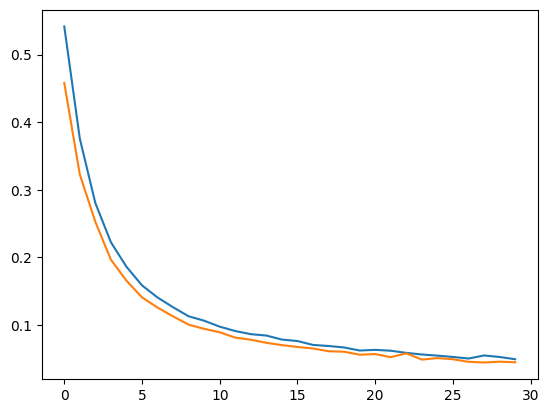

In [6]:
import matplotlib.pyplot as plt
plt.plot(total_train_loss, label='train_loss')
plt.plot(total_test_loss, label='test_loss')

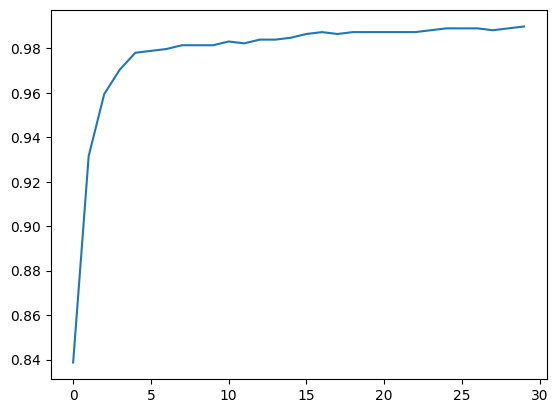

In [7]:
plt.plot(total_acc, label='accuracy')

In [13]:
# foward test2
model = resnet18().to(DEVICE)
model.load_state_dict(torch.load('resnet.pth'))
model.eval()
val_total = 0
correct = 0
total = 0
with torch.no_grad():
    for i, (data, target) in enumerate(test2_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        loss = criterion(output, target)
        val_total += loss.item()
print(f'Accuracy {correct/total}')

/home/uichan8/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/uichan8/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy 0.75


# 3. transfomer

In [9]:
from tools.Model import vit_base

In [14]:
model = vit_base().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
EPOCH = 10

total_train_loss = []
total_test_loss = []
total_acc = []
for epoch in range(EPOCH):
    print(f'Epoch {epoch+1}')
    model.train()
    train_total = 0
    for i, (data, target) in tqdm(enumerate(train_loader)):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_total += loss.item()
    print(f'Train_Loss {train_total/(i+1)}')
    total_train_loss.append(train_total/(i+1))
    
    model.eval()
    max_acc = 0
    correct = 0
    total = 0
    val_total = 0
    with torch.no_grad():
        for i, (data, target) in enumerate(test_loader):
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            loss = criterion(output, target)
            val_total += loss.item()
    total_test_loss.append(val_total/(i+1))
    print(f'Accuracy {correct/total}')
    total_acc.append(correct/total)
    if correct/total > max_acc:
        max_acc = correct/total
        torch.save(model.state_dict(), 'vit.pth')

Epoch 1


37it [00:47,  1.28s/it]


Train_Loss 0.12903489230351672
Accuracy 0.9847972972972973
Epoch 2


37it [00:47,  1.27s/it]


Train_Loss 0.026941637974232435
Accuracy 0.9940878378378378
Epoch 3


37it [00:47,  1.28s/it]


Train_Loss 0.019745681441162486
Accuracy 0.9940878378378378
Epoch 4


37it [00:47,  1.28s/it]


Train_Loss 0.016360863177986764
Accuracy 0.9940878378378378
Epoch 5


37it [00:47,  1.28s/it]


Train_Loss 0.01204521712419149
Accuracy 0.9966216216216216
Epoch 6


37it [00:47,  1.28s/it]


Train_Loss 0.010413355326179314
Accuracy 0.9940878378378378
Epoch 7


37it [00:48,  1.31s/it]


Train_Loss 0.009565648731360262
Accuracy 0.9949324324324325
Epoch 8


37it [00:47,  1.28s/it]


Train_Loss 0.00807834292346662
Accuracy 0.9949324324324325
Epoch 9


37it [00:47,  1.28s/it]


Train_Loss 0.007477666820852539
Accuracy 0.995777027027027
Epoch 10


37it [00:47,  1.28s/it]


Train_Loss 0.0060902455305630295
Accuracy 0.9966216216216216


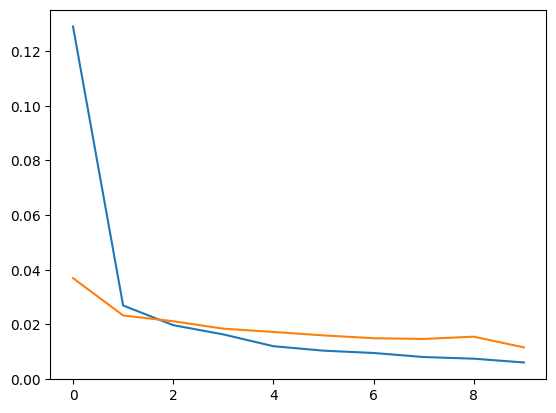

In [15]:
plt.plot(total_train_loss, label='train_loss')
plt.plot(total_test_loss, label='test_loss')

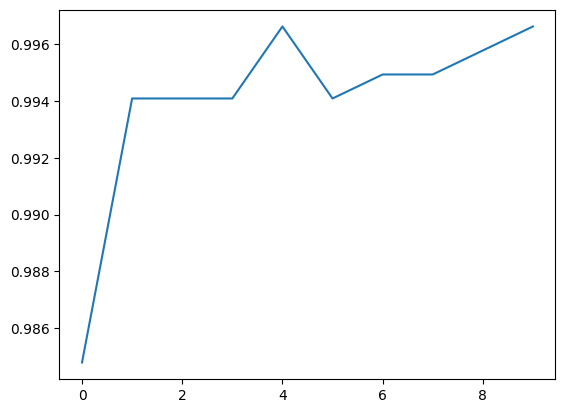

In [16]:
plt.plot(total_acc, label='accuracy')

In [17]:
# foward test2
model = vit_base().to(DEVICE)
model.load_state_dict(torch.load('vit.pth'))
model.eval()
val_total = 0
correct = 0
total = 0
with torch.no_grad():
    for i, (data, target) in enumerate(test2_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        loss = criterion(output, target)
        val_total += loss.item()
print(f'Accuracy {correct/total}')

Accuracy 0.875


# CLIP classification

In [19]:
import clip
import os
from PIL import Image

In [20]:
model, preprocess = clip.load("ViT-B/32", device=DEVICE)
classes = ["muffin", "chihuahua"]

text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classes]).to(DEVICE)
muffin_img = [os.path.join('data/test2/muffin', i) for i in os.listdir('data/test2/muffin')]
chihuahua_img = [os.path.join('data/test2/chihuahua', i) for i in os.listdir('data/test2/chihuahua')]
image_inputs = torch.stack([preprocess(Image.open(i)).to(DEVICE) for i in muffin_img + chihuahua_img])
label = [0]*len(muffin_img) + [1]*len(chihuahua_img)

with torch.no_grad():
    image_features = model.encode_image(image_inputs)
    text_features = model.encode_text(text_inputs)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    print(similarity)

    correct = 0
    for i in range(len(label)):
        if similarity[i][label[i]] > 0.5:
            correct += 1
    print(f'Accuracy {correct/len(label)}')



tensor([[1.0000e+00, 6.9737e-06],
        [9.9854e-01, 1.4105e-03],
        [1.0000e+00, 1.9848e-05],
        [1.0000e+00, 1.0073e-04],
        [1.0000e+00, 4.9889e-05],
        [1.0000e+00, 2.3842e-06],
        [1.0000e+00, 2.0027e-04],
        [1.0000e+00, 1.7881e-07],
        [1.7990e-02, 9.8193e-01],
        [2.0340e-02, 9.7949e-01],
        [4.6021e-02, 9.5410e-01],
        [4.8041e-04, 9.9951e-01],
        [4.0833e-02, 9.5898e-01],
        [3.4595e-04, 9.9951e-01],
        [5.2612e-02, 9.4727e-01],
        [9.2712e-02, 9.0723e-01]], device='cuda:0', dtype=torch.float16)
Accuracy 1.0
